In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# READ IMAGE CAPTURED
def read_image():
    img1 = cv2.imread('img.jpg')
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    return img

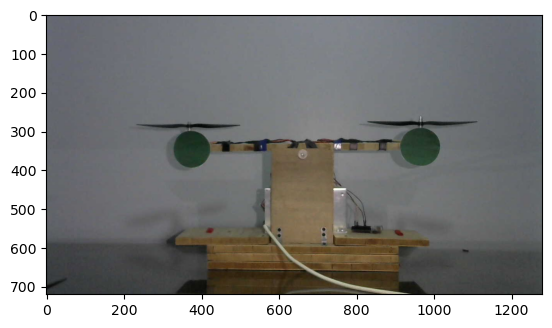

In [3]:
img = read_image()
plt.imshow(img)

True

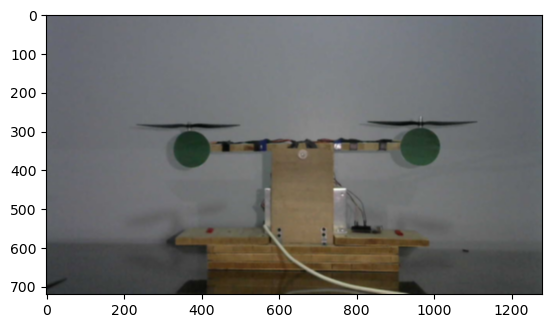

In [4]:
# APPLY MORPHOLOGICAL OPERATIONS
n=5
#Box Blur
kernel = np.ones((n,n),np.float32)/(n*n)
filt_avg = cv2.filter2D(img,-1,kernel)
#cv2.imwrite('Images/AveragingFilter.jpg',filt_avg)
#plt.imshow(filt_avg,cmap='gray')
plt.imshow(filt_avg)
filt_avg = cv2.cvtColor(filt_avg,cv2.COLOR_BGR2RGB)
cv2.imwrite('Images/AveragingFilter.jpg',filt_avg)

True

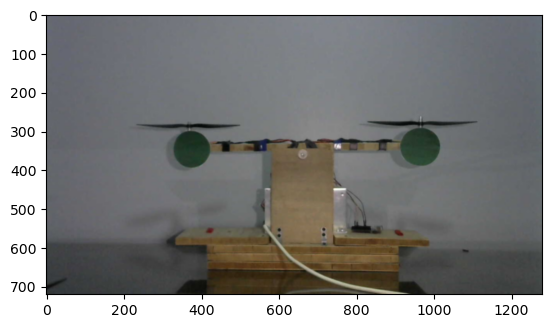

In [5]:
#Gaussian Blur
filt_gauss=cv2.GaussianBlur(img,(n,n),0)
plt.imshow(filt_gauss)
filt_gauss = cv2.cvtColor(filt_gauss,cv2.COLOR_BGR2RGB)
cv2.imwrite('Images/GaussianFilter.jpg',filt_gauss)

In [54]:
# CANNY EDGE DETECTION
img = read_image()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

wide = cv2.Canny(blurred, 50, 200)
cv2.imwrite('Images/WideCanny.jpg',wide)
mid = cv2.Canny(blurred, 30, 150)
cv2.imwrite('Images/MidCanny.jpg',mid)
tight = cv2.Canny(blurred, 210, 250)
cv2.imwrite('Images/TightCanny.jpg',tight)

midb = cv2.Canny(blurred, 0, 60)
cv2.imwrite('Images/BestCanny.jpg',midb)

True

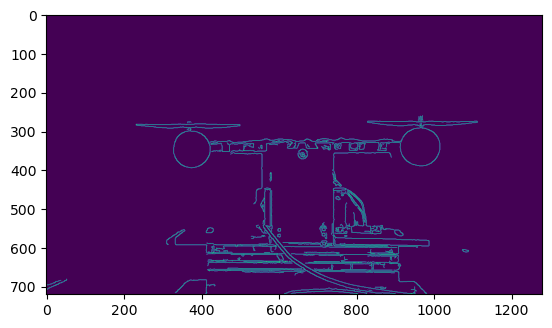

In [55]:
plt.imshow(midb)

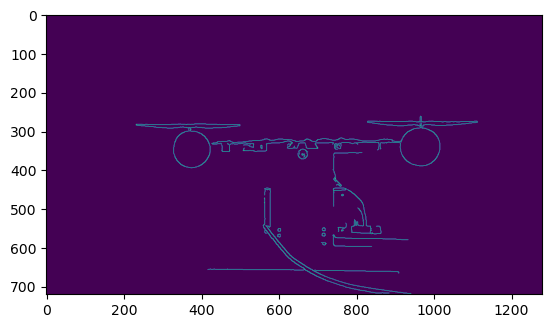

In [33]:
plt.imshow(wide)

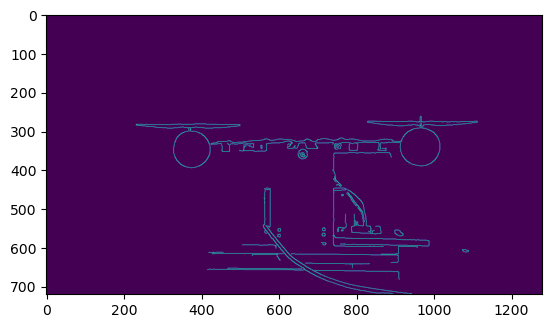

In [34]:
plt.imshow(mid)

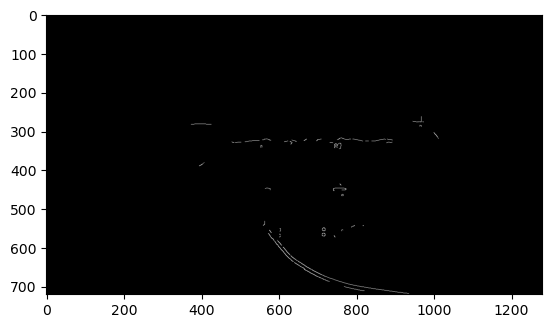

In [35]:
plt.imshow(tight, cmap='gray')

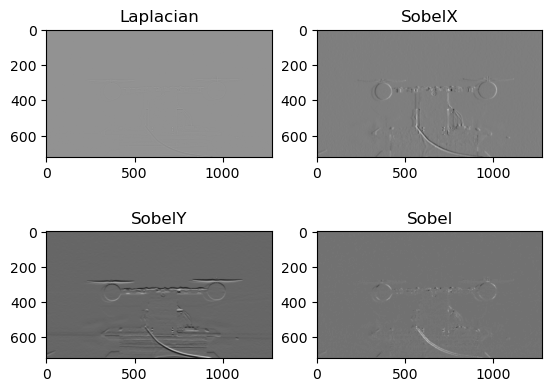

In [63]:
# EDGE DETECTION USING SOBEL
img = read_image()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
cv2.imwrite('Images/LaplacianEdgeDetection.jpg',laplacian)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=15)
cv2.imwrite('Images/SobelxEdgeDetection.jpg',sobelx)

sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=15)
cv2.imwrite('Images/SobelyEdgeDetection.jpg',sobely)

sobel = cv2.bitwise_and(sobelx, sobely)
cv2.imwrite('Images/SobelEdgeDetection.jpg',sobel)

# plot images
plt.subplot(2, 2, 1)
plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian')
  
plt.subplot(2, 2, 2)
plt.imshow(sobelx,cmap='gray')
plt.title('SobelX')
  
plt.subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')
plt.title('SobelY')
  
plt.subplot(2, 2, 4)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel')
  
plt.show()

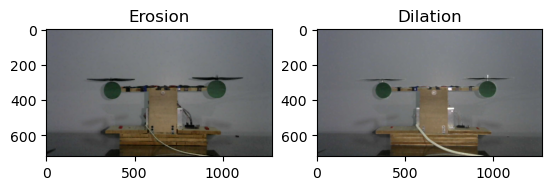

In [17]:
# EROSION AND DILATION
img = read_image()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)

img_erosion = cv2.erode(img, kernel, iterations=1)
img_erosion1 = cv2.cvtColor(img_erosion,cv2.COLOR_BGR2RGB)
cv2.imwrite('Images/Erosion.jpg',img_erosion1)

img_dilation = cv2.dilate(img, kernel, iterations=1)
img_dilation1 = cv2.cvtColor(img_dilation,cv2.COLOR_BGR2RGB)
cv2.imwrite('Images/Dilation.jpg',img_dilation1)

# plot images
plt.subplot(2, 2, 1)
plt.imshow(img_erosion, cmap='gray')
plt.title('Erosion')
  
plt.subplot(2, 2, 2)
plt.imshow(img_dilation, cmap='gray')
plt.title('Dilation')
plt.show()

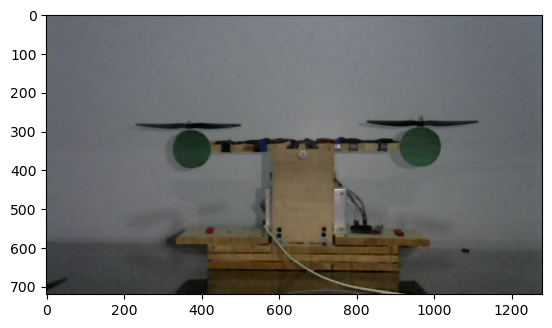

In [18]:
plt.imshow(img_erosion, cmap='gray')

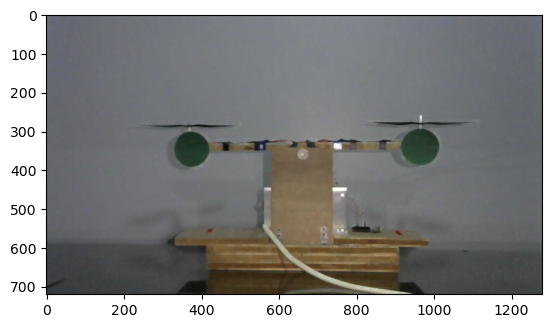

In [19]:
plt.imshow(img_dilation, cmap='gray')

True

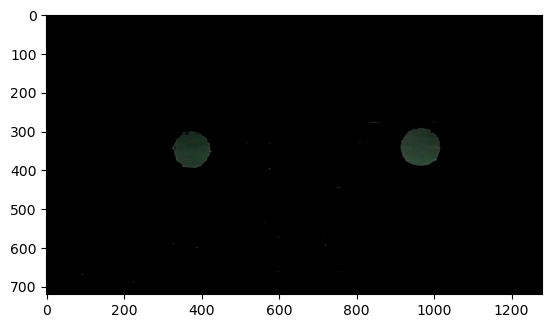

In [24]:
# GREEN SEGMENTATION
img = read_image()
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# Define the range of green color in HSV
#lower_green = np.array([40, 50, 50])
#upper_green = np.array([80, 255, 255])
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(result,cmap='gray')
cv2.imwrite('Images/GreenSegmentation.jpg',result)

True

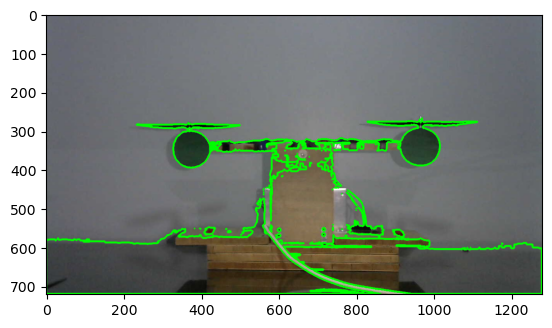

In [26]:
# Contour Detection for Image Segmentation
img = read_image()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cnts, heir = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img2 = img.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3)
plt.imshow(img2)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
cv2.imwrite('Images/Contour Detection.jpg',img2)

True

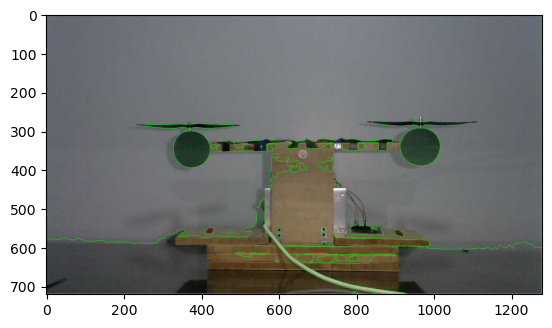

In [31]:
## WATERSHED ALGORITHM
img = read_image()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
## Applying dilation for sure_bg detection
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
## Defining kernel for opening operation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
## After opening, perform dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)
## Sure background image
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = np.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
## Add one so that sure background is not 1
markers = markers +1
## Making the unknown area as 0
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
## boundary region is marked with -1
img[markers == -1] = (0, 255, 0)
plt.imshow(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imwrite('Images/WATERSHED Segmentation.jpg',img)